## This is a demonestratin for the impact of key length in breaking RSA
### I tried different key sizes in the range [8, 64] and the results are shown in a graph

In [2]:
from transmorpher import Transmorpher
from rsa import RSA
from time import time
import matplotlib.pyplot as plt

In [7]:
elapsed_times = []
key_range = range(8, 64)

for key_length in key_range:
    rsa = RSA(Transmorpher, key_length)
    PU = rsa.generate_keys()
    start = time()
    PR = rsa.break_rsa(PU)
    end = time()
    elapsed_time = end - start
    elapsed_times.append(elapsed_time)

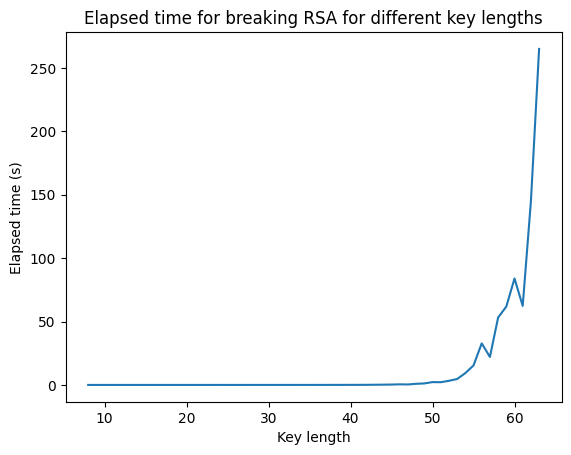

In [8]:
plt.plot(key_range, elapsed_times)
plt.xlabel('Key length')
plt.ylabel('Elapsed time (s)')
plt.title('Elapsed time for breaking RSA for different key lengths')
plt.show()

In [15]:
encryption_times = []
decryption_times = []
key_generation_times = []
key_range = [1 << i for i in range(3, 14)]


for key_length in key_range:
    rsa = RSA(Transmorpher, key_length)
    
    start = time()
    PU = rsa.generate_keys()
    end = time()
    key_generation_times.append(end - start)
    
    rsa.encryption_key = PU
    plaintext = "message"
    
    start = time()
    ciphertext = rsa.encrypt(plaintext)
    end = time()
    encryption_times.append(end - start)

    start = time()
    rsa.decrypt(ciphertext)
    end = time()
    decryption_times.append(end - start)

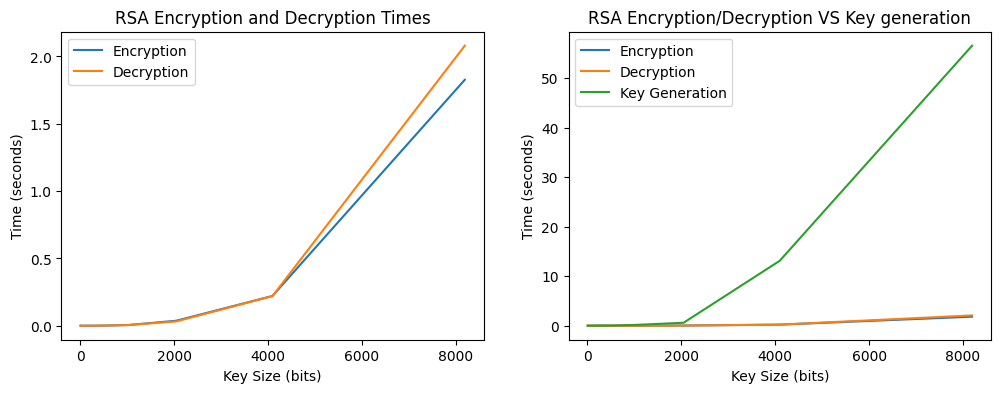

In [27]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1]})

# First subplot: Encryption and Decryption
ax1.plot(key_range, encryption_times, label='Encryption')
ax1.plot(key_range, decryption_times, label='Decryption')
ax1.set_xlabel('Key Size (bits)')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('RSA Encryption and Decryption Times')
ax1.legend()

# Second subplot: All operations
ax2.plot(key_range, encryption_times, label='Encryption')
ax2.plot(key_range, decryption_times, label='Decryption')
ax2.plot(key_range, key_generation_times, label='Key Generation')
ax2.set_xlabel('Key Size (bits)')
ax2.set_ylabel('Time (seconds)')
ax2.set_title('RSA Encryption/Decryption VS Key generation')
ax2.legend()

plt.show()


## Analysis and conclusion
The above graph makes it obvious that the time required to break RSA grows exponentially with the key size. But this takes significantly less time than symmetric encryption breaking schemes so a key size of 56 bit, 112 bit or 128 bit used for DES, 3DES and AES, respectively will be insufficient and we would require larger key length for RSA typically, 1024 bit or 2048 bit. 
According to a well-known theorem in number theory, any integer `n` must have a prime factor less than or equal to its square root. Therefore, the effective key size of RSA with a key length of $2^n$ is $2^{n/2}$.

We also notice that the primes generated are not uniformly distributed but rather concentrated in the upper part of the range so a more practical scheme would start with $\sqrt{n}$ down to 2 but of course this depends on the particular scheme used for generating the primes.
The graph experiences jumps and discontinuities this is due to the randomness in the process, a more practical approach to analysing the relationship between the key length and time would be to repeat the above process for each key length a specified number of times and take the average, this will smooth out the curve and give more accurate results, but of course this will take much time so I opted out :)

The downside of using large key length is the deterioration in the performance and efficiency of encryption and decryption which is also exponential and we can see from the graph that a key size larger than 2048 is impractical. 
Yet, key generation takes significantly more time than encryption/decryption but that's not really a problem since it happens only once.